#Talk 1: 「scikit-learnによる機械学習はじめの一歩」

##自己紹介

###阿久津　剛史

    - Start Python Club幹事
    - 某メーカー勤務
    - Python歴1年半。プログラミングを趣味と実用を兼ねて、勉強中。
    - 機械学習ツールを使えるようになることが現在の目標。
    - Twitter @akucchan_world

###今日やること
    - scikit-learnを使った簡単な機械学習の演習   
    - 演習1. 手書き文字データセットを用いた機械学習
    - 演習2. LFWデータセットを用いた有名人物の顔画像認識
###今日やらないこと
    - 機械学習の理論の説明
    - scikit-learnの詳細な説明

##演習1. 手書き文字データセットを用いた機械学習

##概要
Pythonの機械学習パッケージScikit-learn (sklearn)を利用して、手書き文字の画像認識を行います。<br>
sklearnに付属しているデータセットのうち、digitsという手書き文字データを対象に、<br>
データセットの一部を訓練データとして、教師あり学習により識別モデルを作成し、<br>
残りのデータセットを使ってモデルの予測精度の評価を行います。<br>
サポートベクターマシン（SVM）、ナイーブベイズ分類器など複数の機械学習メソッドを適用して、<br>
精度と計算時間を比較します。

##参考文献
[1] scikit-learn documentation (original source)<br>
http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#example-classification-plot-digits-classification-py<br>
[2] Willi Richert, Luis Pedro Coelho,『実践機械学習システム』, オライリー・ジャパン<br>
http://www.oreilly.co.jp/books/9784873116983/<br>
[3] UCI ML Repository, "Optical Recognition of Handwritten Digits Data Set "<br>
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits<br>
[4] Cyrille Rossant,『IPythonデータサイエンスクックブック』, オライリー・ジャパン<br>
http://www.oreilly.co.jp/books/9784873117485/

##手順
1. データのロード
2. 分類器の生成
3. データの学習（fit）
4. データの予測（predict）
5. モデルの評価（score）
6. デジタル文字画像の識別
7. 複数の分類器の比較
8. まとめ

##1. データのロード
###手書き文字データセットdigitsをsklearn.datasetsからロードする
- digitsはdict形式のデータ
- 8x8 pixelsの白黒画像データで、16段階の濃度表示
- オリジナルは5620個のデータ数、sklearn版は1797個

詳細はsklearnサイトを参照<br>
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [347]:
#matplotlib, numpyのimportとinline表示
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [348]:
# 手書き文字データセットdigits
from sklearn.datasets import load_digits
digits = load_digits()

In [349]:
# digitsデータセットの内容
digits.keys()

dict_keys(['target', 'DESCR', 'images', 'data', 'target_names'])

###digitsの内容を確認する
sklearn.datasetsのサンプルデータは基本的に似た構成
- DESCR: データセットの説明
- target: ラベル（目的変数）、画像データに対応する手書き文字の真値
- target_names: ラベルの呼称、0〜９の数値のリスト
- data: 特徴量（説明変数）、1797個の8x8pixelsの濃度データが64個の1次元配列に整列
- images: 画像データ、dataを8x8の2次元配列に整列

In [350]:
# digits.DESCR
# データセットの説明
print(digits.DESCR)

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

In [351]:
# digits.data
# 1次元配列にした画像データ
# データ数：1797
# 特徴量の次元：8x8pixels、16段階のグレイスケールで１次元配列なので64
print(digits.data.shape)

(1797, 64)


In [352]:
# digit.images
# 8x8の２次元配列になった画像データ
# データ数：1797個。
n_samples = len(digits.images)
print("number of datasets:", n_samples)

number of datasets: 1797


In [353]:
# 8x8 pixelの手書き文字データ。0〜15で濃度を表現。
image = digits.images[0]
print(image)

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [354]:
#digits.data[0]を8x8にreshapeすると同じデータになる
print(digits.data[0].reshape(8,8))

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [355]:
# digits.target
# 手書き文字画像の真の値。digits.imagesと同じ順に並ぶ。
label = digits.target[0]
print(label)

0


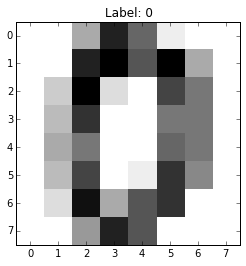

In [356]:
# digits.imagesの1つ目のデータを表示
plt.subplot(111)
plt.xticks()
plt.yticks()
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Label: %i' % label)
plt.show()

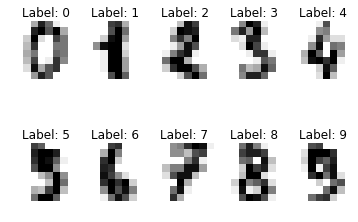

In [357]:
# 最初の10サンプルを描画
# digits.images[i] : i番目の画像データ（8x8ピクセル）
# digits.target[i] : i番目の画像データのクラス（数字なので0-9）
for index, (image, label) in enumerate(zip(digits.images[:10], digits.target[:10])):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)

##2. 分類器の生成
###sklearnパッケージに含まれている分類器のインスタンスを生成する

In [358]:
# sklearnパッケージから5種の分類器をimportする
from sklearn.svm import SVC #サポートベクターマシン
from sklearn.neighbors import KNeighborsClassifier #k近傍法
from sklearn.naive_bayes import GaussianNB #ガウシアンナイーブベイズ
from sklearn.ensemble import AdaBoostClassifier #Adaboost
from sklearn.ensemble import RandomForestClassifier #ランダムフォレスト

# 計算時間測定のためtimeをimportする
from time import time

In [359]:
# サポートベクターマシンの分類器を作成する
clf = SVC(gamma=0.001)

##3. データの学習（fit）
###訓練データで生成した分類器を学習させる

In [360]:
# 特徴量(data)とラベル（target）をそれぞれ半分に分割し、
# 前半を訓練データ、後半をテストデータとする
X_train = digits.data[:n_samples / 2]
X_test = digits.data[n_samples/2:]
y_train = digits.target[:n_samples / 2]
y_test = digits.target[n_samples / 2:]

In [361]:
# 文字データ（data）のうち前半を訓練データとして、分類器を学習させる
t0 = time()
clf.fit(X_train, y_train)
t1 = time()
t_time = t1-t0
print("training time:", round(t_time, 4), "s")

training time: 0.0756 s


##4. データの予測（predict）
###学習した分類器に対してテストデータを適用して、ラベルを予測する

In [362]:
# 文字データ（data）の残り半分をテストデータとして、作成したモデルで予測する
pred = clf.predict(X_test)

##5. モデルの評価（score）
###予測した値とテストデータの真値を比較して、モデルの精度を評価する

In [363]:
# scoreメソッドで予測の精度を評価する
acc = clf.score(X_test, y_test)
print("accuracy: %.4f" % acc)

accuracy: 0.9689


In [364]:
# Classification report
# 分類器のパラメータと結果を表示する
from sklearn.metrics import classification_report
print("Classification report for classifier %s:\n%s\n"
      % (clf, classification_report(y_test, pred)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




In [365]:
# Confusion matrix
# 分類結果をマトリクスで表示する
from sklearn.metrics import confusion_matrix
print("Confusion matrix:\n%s" % confusion_matrix(y_test, pred))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


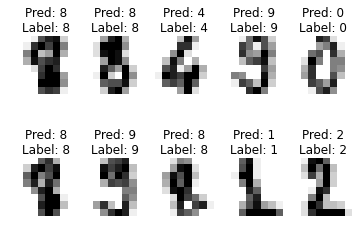

In [366]:
images_and_predictions = list(zip(digits.images[n_samples / 2:], pred))
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Pred: %i\nLabel: %i' % (prediction, digits.target[n_samples / 2 + index]))
#     'predicted: %s\ntrue:      %s' % (pred_name, true_name)

In [367]:
# 結果をDataFrameに保管する
import pandas as pd
result = {'accuracy': acc, 't_time': t_time}
df = pd.DataFrame(result, index=['SVC'])
df

,accuracy,t_time
SVC,0.968854,0.075602


##6. デジタル文字画像の識別
###人為的に作成したデジタル文字画像から数値を判別する

In [368]:
# "1"のデジタル文字画像をnumpy.arrayで作成する
one = np.zeros((8,8))
one[1:-1, 4] = 15
one[2,3] = 15
print(one)

[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  15.   0.   0.   0.]
 [  0.   0.   0.  15.  15.   0.   0.   0.]
 [  0.   0.   0.   0.  15.   0.   0.   0.]
 [  0.   0.   0.   0.  15.   0.   0.   0.]
 [  0.   0.   0.   0.  15.   0.   0.   0.]
 [  0.   0.   0.   0.  15.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


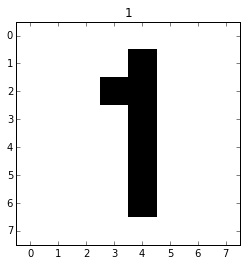

In [369]:
# 作成したデジタル文字データoneをmatplotlib.imshowで表示する
plt.imshow(one, cmap=plt.cm.gray_r, interpolation='nearest')
plt.grid(False)
plt.xticks()
plt.yticks()
plt.title("1")
plt.show()

In [370]:
# データoneを分類器にかけて、値を判別する
pred_one = clf.predict(one.ravel())
print("result:", str(pred_one[0]))
if pred_one[0] == 1:
    print("当たり")
else:
    print("はずれ")

result: 1
当たり


##7. 複数の分類器の比較
計算時間と精度を記録して、表形式で出力する

In [371]:
# 複数の分類器の略称をキーとして、インスタンス生成のコードを記録する
clf_dict = {
    'KNN': 'KNeighborsClassifier()',          #k近傍法
    'GNB': 'GaussianNB()',                         #ガウシアンナイーブベイズ
    'RFC': 'RandomForestClassifier()',     #ランダムフォレスト
    'ABC': 'AdaBoostClassifier()'             #AdaBoost
}

In [372]:
# forループで4つの分類法を一気に機械学習し、モデルを評価する
for key in clf_dict:
    print(key)
    clf = eval("{}".format(clf_dict[key]))
    t0 = time()
    clf.fit(X_train, y_train)
    t1 = time()
    t_time = t1-t0
    print("training time:", round(t_time, 4), "s")

    pred = clf.predict(X_test)
    acc = clf.score(X_test, y_test)
    df.ix[key]={'accuracy': acc, 't_time': t_time}
    print("accuracy: %.4f" % acc)
    print()

GNB
training time: 0.0058 s
accuracy: 0.7842

RFC
training time: 0.0269 s
accuracy: 0.8754

ABC
training time: 0.1622 s
accuracy: 0.2547

KNN
training time: 0.002 s
accuracy: 0.9555



###結果の表示、画像と実際の値の比較

In [373]:
df

,accuracy,t_time
SVC,0.968854,0.075602
GNB,0.784205,0.005798
RFC,0.875417,0.026906
ABC,0.254727,0.162189
KNN,0.955506,0.002031


###考察
SVC（サポートベクターマシン）の精度が最高、次にKNN（k近傍法）の精度が高い結果となりました。<br>
ただしKNNはSVCに比べて、約1/20の時間でモデリングを行っています。<br>
SVCは次元が大きくなると、処理時間が長くなる傾向があるので、<br>
精度よりも処理のパフォーマンスを求めるのであれば、KNNを利用することもあります。

##8. まとめ
scikit-learnパッケージに含まれている手書き文字のデータセットdigitsを用いて、<br>
教師あり学習の演習を行いました。<br>
1. モデルの生成
2. 訓練データによる分類器の学習（fit）
3. テストデータに対する予測（predict）
4. テストデータと予測を比較する評価（score）

の基本的な機械学習のプロセスを学びました。<br>
機械学習は画像認識に限らず、自然言語処理など幅広い用途に適用されています。<br>